# 线性回归算法

## 最小二乘法


Automatically created module for IPython interactive environment
('Coefficients: \n', array([938.23786125]))
Mean squared error: 2548.07
Variance score: 0.47


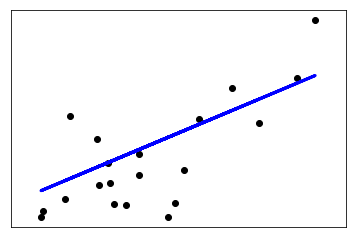

In [2]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [2]:
import os
os.chdir('ud120-projects/regression')


In [3]:

import sys
import pickle
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
dictionary = pickle.load( open("../final_project/final_project_dataset_modified.pkl", "r") )

### list the features you want to look at--first item in the 
### list will be the "target" feature
features_list = ["bonus", "salary"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )

### training-testing split needed in regression, just like classification
from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "c"
test_color = "b"


/srv/conda/envs/kernel/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:


### Your regression goes here!
### Please name it reg, so that the plotting code below picks it up and 
### plots it correctly. Don't forget to change the test_color above from "b" to
### "r" to differentiate training points from test points.


from sklearn import linear_model

# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(feature_train, target_train)




LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

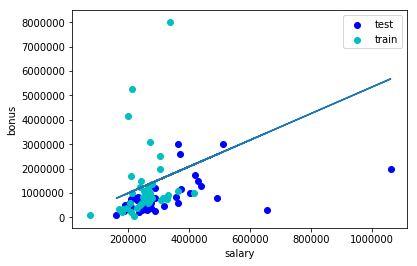

In [6]:


### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")


### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass
plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()

In [7]:
print reg.coef_

[5.44814029]


In [8]:
print reg.intercept_

-102360.54329387983
